In this notebook I create the figures for the fluxtubestability paper.

In [2]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

# Fig. 1 - Theory Summary

In [3]:
import sys
sys.path.append('..')

import sympy as sp
sp.init_printing()

import numpy as np
from scipy.special import kv, kvp

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')


import lambda_k_plotting_simple as plot
reload(plot)
import analytic_condition as ac

In [4]:
import analytic_condition
reload(analytic_condition)
from analytic_condition import conditions
import equil_solver as es

# Fig. 1 Analytical and numerical profile plots

In [4]:
import sympy as sp
j0_sym, r_sym, mu_0_sym = sp.symbols('j_0 r mu_0')
current_sym = j0_sym*(1 - r_sym**2)**2
b_theta_sym = mu_0_sym*sp.integrate(current_sym*r_sym, r_sym, conds='none')/r_sym
p_prime_sym = -current_sym*b_theta_sym
pressure_sym = sp.integrate(p_prime_sym, r_sym, conds='none')
pressure_norm_sym = pressure_sym - pressure_sym.subs(r_sym, 1)

current_func = sp.lambdify((r_sym, j0_sym), current_sym)
b_theta_func = sp.lambdify((r_sym, j0_sym, mu_0_sym), b_theta_sym)
pressure_func = sp.lambdify((r_sym, j0_sym, mu_0_sym), pressure_norm_sym)

In [4]:
r = np.linspace(0, 1, 750)

### Difffuse Pinch

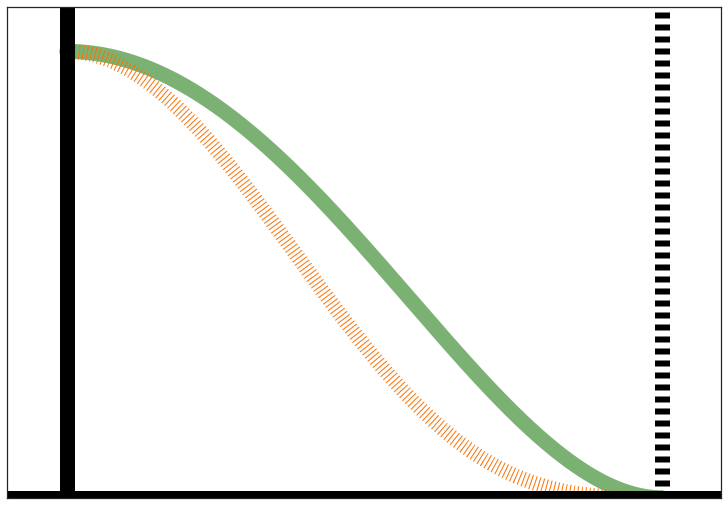

In [5]:
z_current = current_func(np.abs(r), 1) 
z_b_theta = b_theta_func(np.abs(r), 1, 1) / b_theta_func(np.abs(r), 1, 1).max()
z_pressure = pressure_func(np.abs(r), 1, 1) / pressure_func(np.abs(r), 1, 1).max()
plt.plot(r, z_current, sns.xkcd_rgb['faded green'], lw=15)
plt.plot(r, z_pressure, sns.xkcd_rgb['orange'], lw=15, linestyle=':')
plt.axvline(x=0, color='black', lw=15)
plt.axvline(x=1, color='black', linestyle='--', lw=15)
plt.axhline(y=0, color='black', lw=15)

plt.xticks([])
plt.yticks([])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1.1)
plt.show()

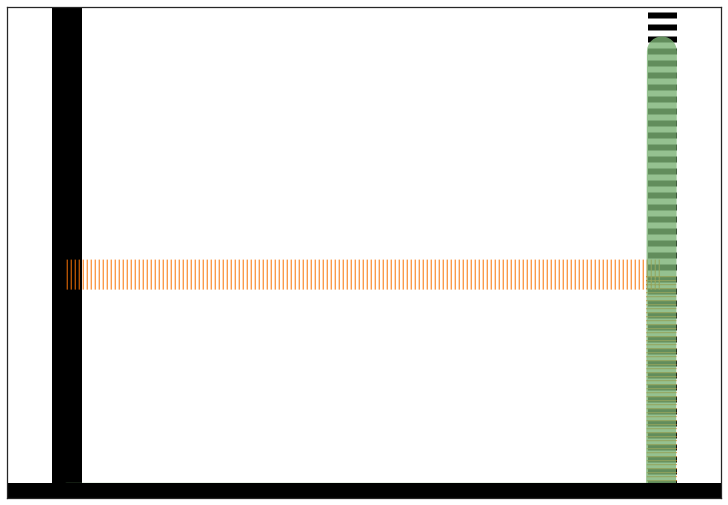

In [6]:
skin_current = np.zeros(r.size)
skin_current[-1] = 1.

skin_b_theta = np.zeros(r.size)
skin_b_theta[-1] = 1.

skin_pressure = 0.5*np.ones(r.size)
skin_pressure[-1] = 0

plt.axvline(x=0, color='black', lw=30)
plt.axvline(x=1, color='black', linestyle='--', lw=29)
plt.plot(r, skin_pressure, sns.xkcd_rgb['orange'], linestyle=':', lw=30)
plt.plot(r, skin_current, sns.xkcd_rgb['faded green'], lw=30, alpha=0.8)
plt.axhline(y=0, color='black', lw=30)

plt.xticks([])
plt.yticks([])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1.1)
plt.show()

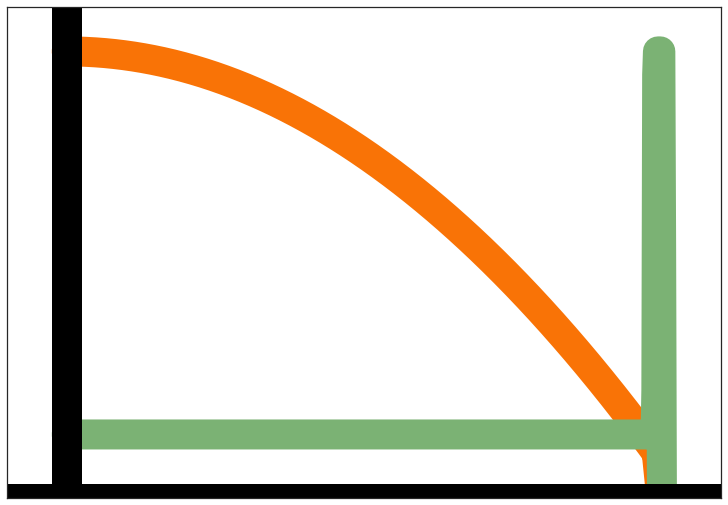

In [7]:
core_skin = es.UnitlessSmoothedCoreSkin(core_radius_norm=0.99, transition_width_norm=0.0025, 
                                skin_width_norm=0.005, epsilon=0.91, points_core=100, 
                                points_skin=100, points_transition=100)
splines = core_skin.get_splines()

core_skin_current = splines['j_z'](np.abs(r)) / splines['j_z'](np.abs(r)).max() 
core_skin_b_theta = splines['b_theta'](np.abs(r)) / splines['b_theta'](np.abs(r)).max()
core_skin_pressure = splines['pressure'](np.abs(r)) / splines['pressure'](np.abs(r)).max()
plt.plot(r, core_skin_pressure, sns.xkcd_rgb['orange'], lw=30)
plt.plot(r, core_skin_current, sns.xkcd_rgb['faded green'], lw=30)
plt.axvline(x=0, color='black', lw=30)
plt.axhline(y=0, color='black', lw=29)
plt.xticks([])
plt.yticks([])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1.1)
plt.show()

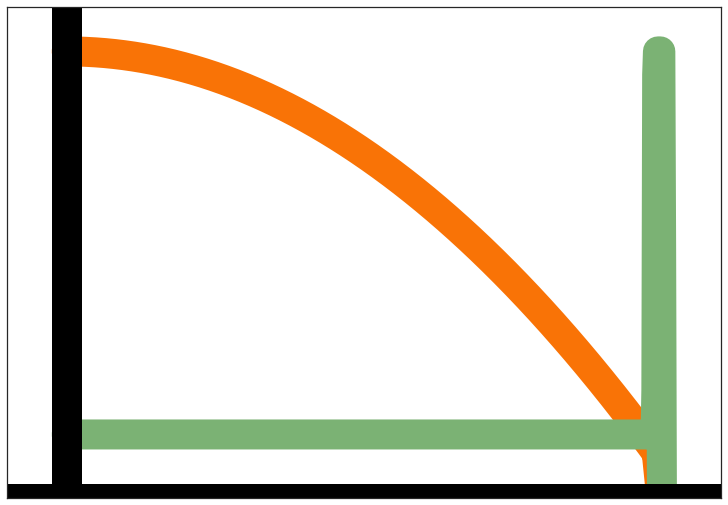

In [8]:
core_skin = es.UnitlessSmoothedCoreSkin(core_radius_norm=0.99, transition_width_norm=0.0025, 
                                skin_width_norm=0.005, epsilon=0.91, points_core=100, 
                                points_skin=100, points_transition=100)
splines = core_skin.get_splines()

core_skin_current = splines['j_z'](np.abs(r)) / splines['j_z'](np.abs(r)).max() 
core_skin_b_theta = splines['b_theta'](np.abs(r)) / splines['b_theta'](np.abs(r)).max()
core_skin_pressure = splines['pressure'](np.abs(r)) / splines['pressure'](np.abs(r)).max()
plt.plot(r, core_skin_pressure, sns.xkcd_rgb['orange'], lw=30)
plt.plot(r, core_skin_current, sns.xkcd_rgb['faded green'], lw=30)
plt.axvline(x=0, color='black', lw=30)
plt.axhline(y=0, color='black', lw=29)
plt.xticks([])
plt.yticks([])
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1.1)
plt.show()

## Fig. 1  Greyscale version

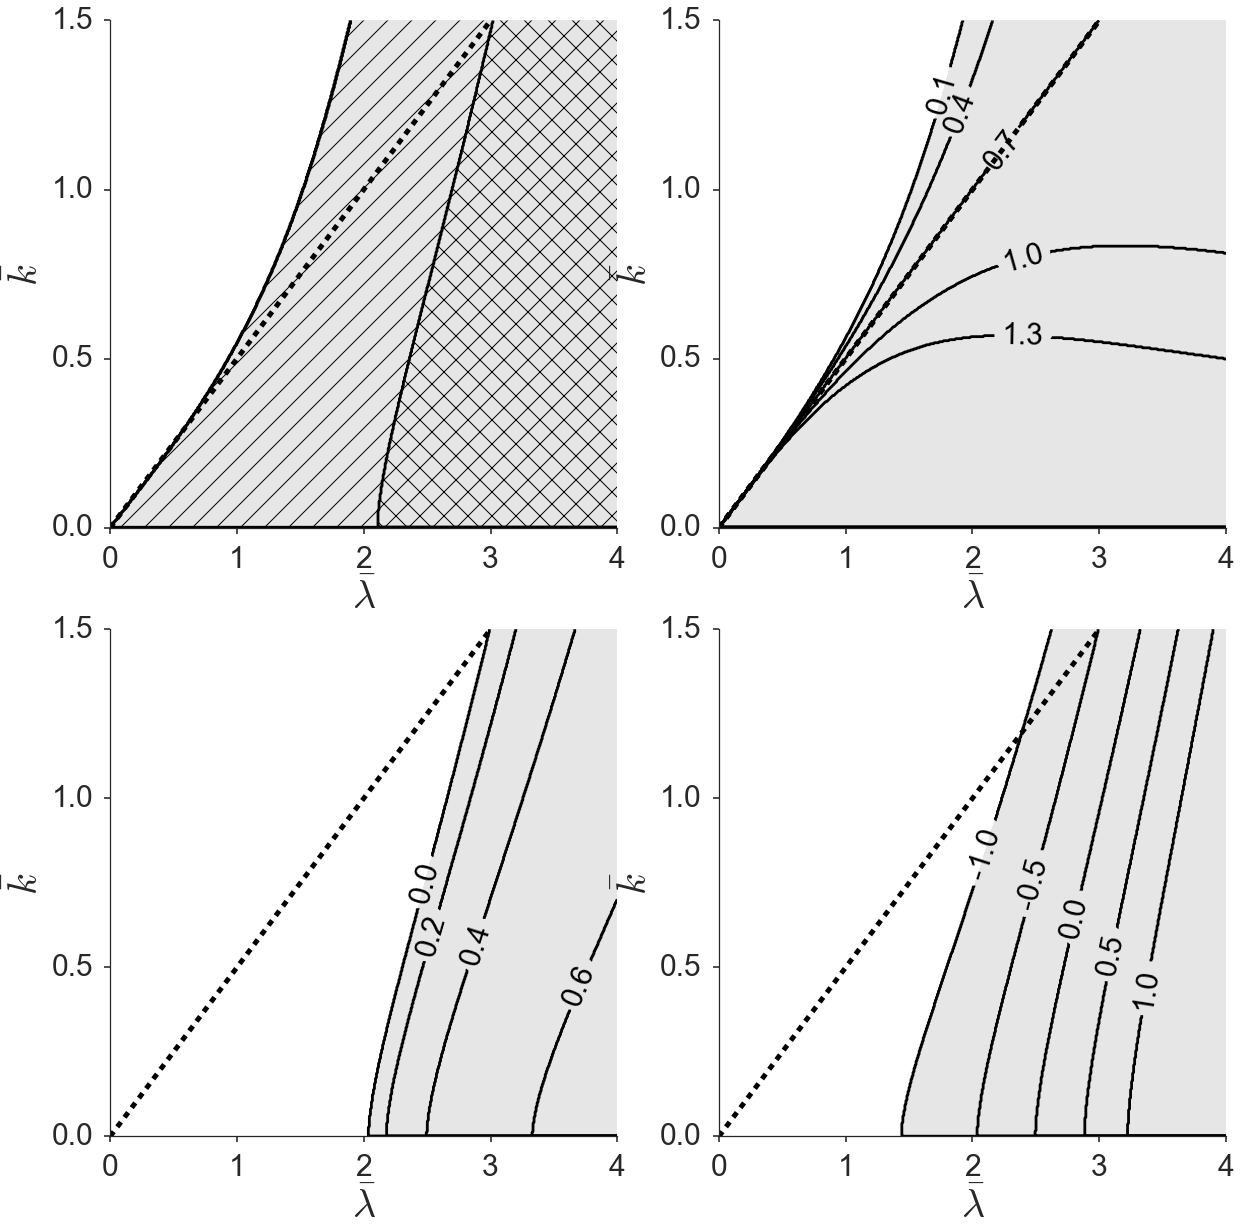

In [9]:
fig, axes = plt.subplots(2, 2,
                         figsize=(20,20),
                         sharex=False, 
                         sharey=False)

example_ax = axes[0][0]
kink_ax = axes[0][1]
sausage_ax = axes[1][0]
delta_ax = axes[1][1]

lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]

## Example Plot ##
##################

d_w_sausage = conditions(k_bar_mesh,
                         lambda_bar_mesh,
                         epsilon=0.1,
                         m=0,
                         delta=0.1)
d_w_kink = conditions(k_bar_mesh,
                      lambda_bar_mesh,
                      epsilon=0.1,
                      m=1,
                      delta=0.1)

stability_sausage = d_w_sausage < 0
stability_kink = d_w_kink < 0
stability = stability_kink.astype(float)
stability[stability_sausage] = 2


cmap = colors.ListedColormap(['1.0',
                              '0.9',
                              '0.9'])

example_ax.contourf(lambda_bar_mesh, k_bar_mesh, stability, cmap=cmap,
                    levels=[0., 0.5, 1.5, 2.], hatches=[None, '/', 'x'])
example_ax.contour(lambda_bar_mesh, k_bar_mesh, stability, 
                   levels=[0., 0.5, 1.5, 2.], colors='black')
example_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

example_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(example_ax.get_xticklabels(), fontsize=30)
example_ax.set_xticks(np.arange(0., 5, 1.))

example_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(example_ax.get_yticklabels(), fontsize=30)
example_ax.set_yticks(np.arange(0., 2.0, 0.5))

## Kink Plot ##
###############

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors='black')
kink_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt='%.1f')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)

kink_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
kink_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(kink_ax.get_xticklabels(), fontsize=30)
kink_ax.set_xticks(np.arange(0., 5, 1.))

kink_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(kink_ax.get_yticklabels(), fontsize=30)
kink_ax.set_yticks(np.arange(0., 2.0, 0.5))

## Sausage Plot ##
##################

delta = 0.
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.0, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1., 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors='black')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, fontsize=30, 
                              manual=([2.5, 0.75],
                                      [2.5, 0.6], 
                                      [3., 0.55],
                                      [3.3, 0.5]),
                               fmt='%.1f')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(sausage_ax.get_xticklabels(), fontsize=30)
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(sausage_ax.get_yticklabels(), fontsize=30)
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))

### delta variance ###
######################

epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)
contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors='black')
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines, 
                  fontsize=30, 
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                          fmt='%.1f')
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

delta_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(delta_ax.get_xticklabels(), fontsize=30)
delta_ax.set_xticks(np.arange(0., 5, 1.))

delta_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(delta_ax.get_yticklabels(), fontsize=30)
delta_ax.set_yticks(np.arange(0., 2.0, 0.5))


sns.despine(fig)
fig.savefig('../../figures/figure_1.png')

## Fig.1 Color version

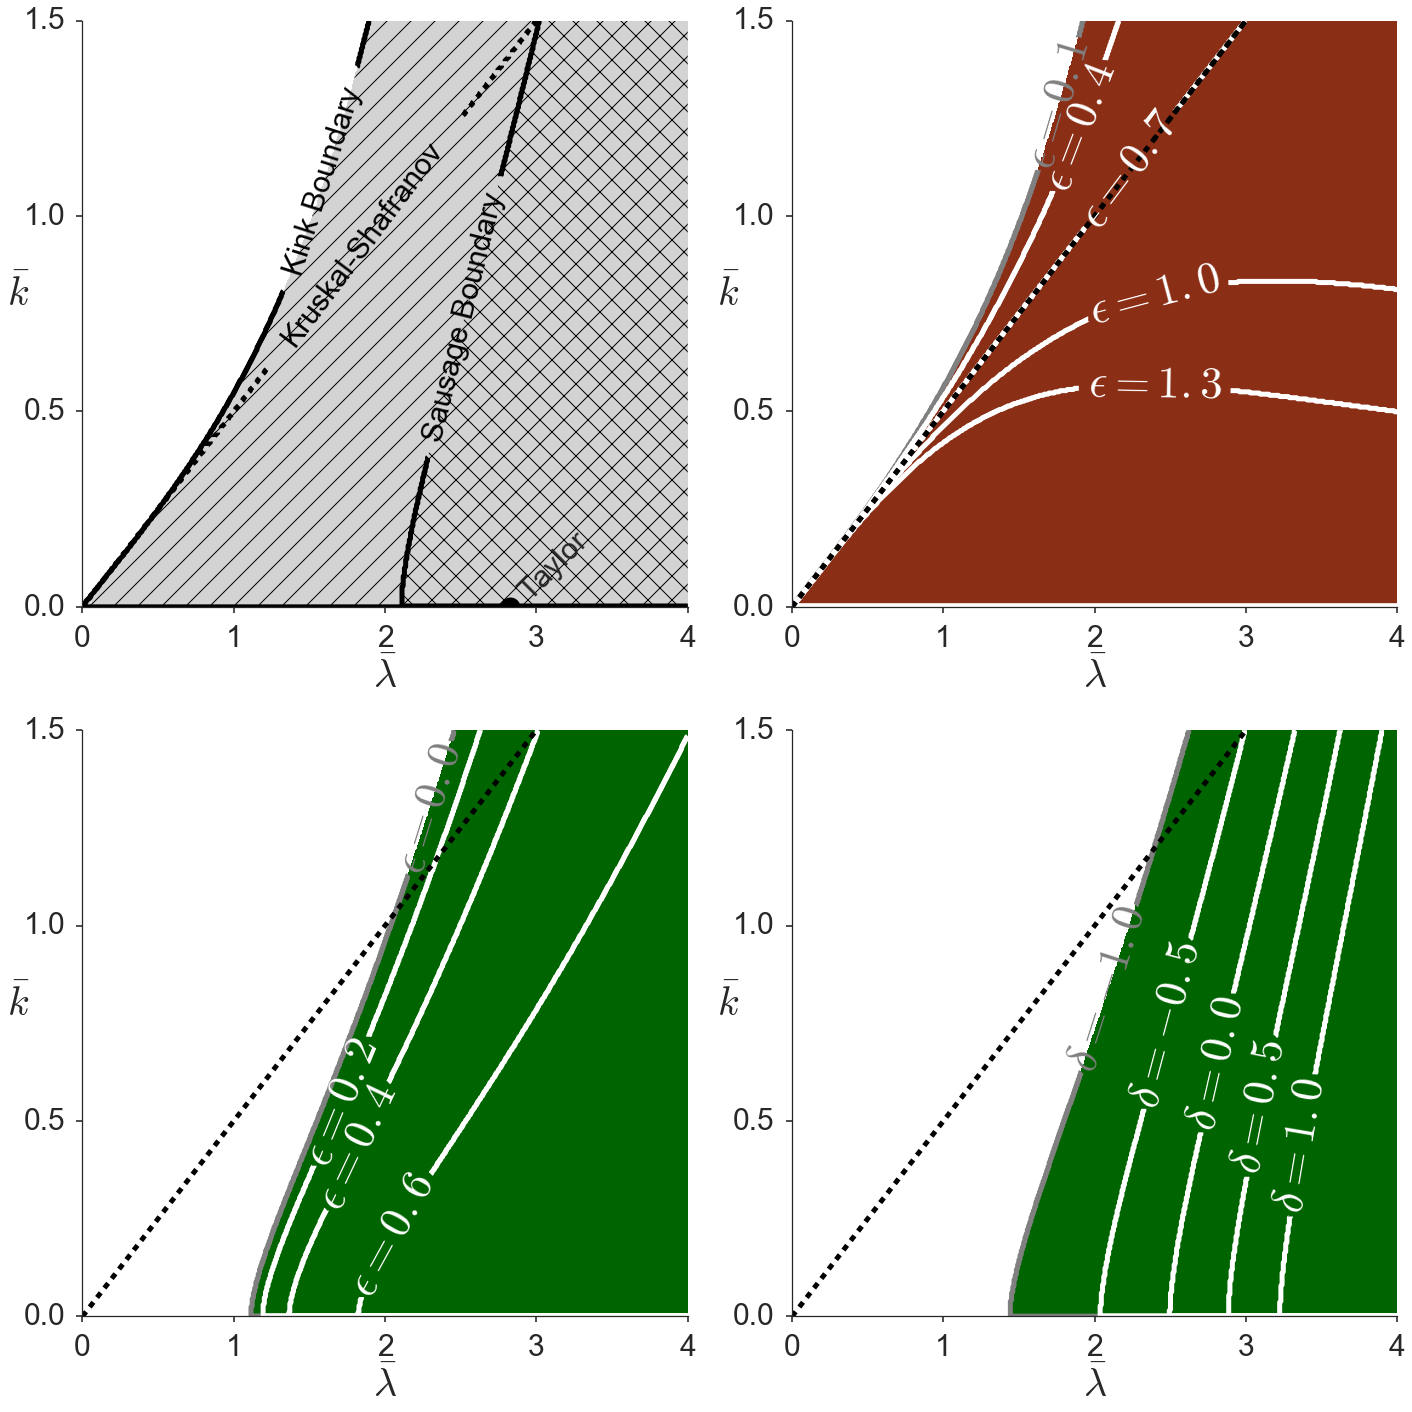

In [52]:
fig, axes = plt.subplots(2, 2,
                         figsize=(20,20),
                         sharex=False, 
                         sharey=False)

example_ax = axes[0][0]
kink_ax = axes[0][1]
sausage_ax = axes[1][0]
delta_ax = axes[1][1]

## Example Plot ##
##################

lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]


d_w_sausage = conditions(k_bar_mesh,
                         lambda_bar_mesh,
                         epsilon=0.1,
                         m=0,
                         delta=0.1)
d_w_kink = conditions(k_bar_mesh,
                      lambda_bar_mesh,
                      epsilon=0.1,
                      m=1,
                      delta=0.1)

stability_sausage = d_w_sausage < 0
stability_kink = d_w_kink < 0
stability = stability_kink.astype(float)
stability[stability_sausage] = 2


cmap = colors.ListedColormap(['white',
                              'lightgrey',
                              'lightgrey'])

example_ax.contourf(lambda_bar_mesh, k_bar_mesh, stability, cmap=cmap,
                    levels=[0., 0.5, 1.5, 2.], hatches=[None, '/', 'x'])
contour_lines = example_ax.contour(lambda_bar_mesh, k_bar_mesh, stability, 
                                   levels=[0., 1.5, 2.], colors='black', linewidths=5)

example_ax.clabel(contour_lines, fontsize=30, 
                  manual=([1.5, 1.1],  
                          [2.5, 0.75]),
                  fmt={0.: 'Kink Boundary', 1.5: 'Sausage Boundary'})

kruskal_shafranov = lambda_bar_mesh > 2 * k_bar_mesh

contour_lines = example_ax.contour(lambda_bar_mesh, k_bar_mesh, kruskal_shafranov, 
                                   levels=[0.5], colors='black', linewidths=5)
contour_lines.collections[0].set_linestyle('--')
example_ax.clabel(contour_lines, fontsize=30,
                  manual=([[1.8, 0.95]]),
                  fmt={0.5: 'Kruskal-Shafranov'})

#example_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

example_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(example_ax.get_xticklabels(), fontsize=30)
example_ax.set_xticks(np.arange(0., 5, 1.))

example_ax.set_ylabel(r'$\bar{k}$', fontsize=40, rotation='horizontal')
plt.setp(example_ax.get_yticklabels(), fontsize=30)
example_ax.set_yticks(np.arange(0., 2.0, 0.5))

example_ax.plot(2*np.sqrt(2), 0.0, 'o', color='black', markersize=20)
example_ax.annotate('Taylor',
                    xy=(2*np.sqrt(2), 0),
                    xytext=(2*np.sqrt(2) + 0.025, 0.15),
                    rotation=45, fontsize=30)

sns.despine()


## Kink Plot ##
###############

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over(sns.xkcd_rgb['red brown'])
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
colors_list = ['grey', 'white', 'white', 'white', 'white']
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors=colors_list,
                               linewidths=5)
kink_ax.clabel(contour_lines, fontsize=45, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt=r'$ \epsilon = %.1f $', colors=colors_list)
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)


kink_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
kink_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(kink_ax.get_xticklabels(), fontsize=30)
kink_ax.set_xticks(np.arange(0., 5, 1.))

kink_ax.set_ylabel(r'$\bar{k}$', fontsize=40, rotation='horizontal')
plt.setp(kink_ax.get_yticklabels(), fontsize=30)
kink_ax.set_yticks(np.arange(0., 2.0, 0.5))

sns.despine()

## Sausage Plot ##
##################

delta = -0.7
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.2, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1.2, 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('darkgreen')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

colors_list = ['grey', 'white', 'white', 'white']

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors=colors_list,
                                   linewidths=5)
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, fontsize=45, 
                              manual=([2.3, 1.3],
                                      [1.75, 0.55],
                                      [2.0, 0.4],
                                      [2.1, 0.2]),
                               fmt=r'$ \epsilon = %.1f$')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(sausage_ax.get_xticklabels(), fontsize=30)
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$', fontsize=40, rotation='horizontal')
plt.setp(sausage_ax.get_yticklabels(), fontsize=30)
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))
sns.despine()


## Delta dependence ##
######################

epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)

colors_list = ['grey', 'white', 'white', 'white', 'white']

contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors=colors_list,
                                 linewidths=5)
contour.cmap.set_over('darkgreen')
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines, 
                  fontsize=45, 
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                  fmt=r'$ \delta = \mathbf{%.1f}$',
                  colors=colors_list)
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
delta_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(delta_ax.get_xticklabels(), fontsize=30)
delta_ax.set_xticks(np.arange(0., 5, 1.))

delta_ax.set_ylabel(r'$\bar{k}$', fontsize=40, rotation='horizontal')
plt.setp(delta_ax.get_yticklabels(), fontsize=30)
delta_ax.set_yticks(np.arange(0., 2.0, 0.5))

plt.tight_layout()

fig.savefig('../../figures/figure_1.svg')

plt.show()

# Individual Plots for talks

In [11]:
lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]

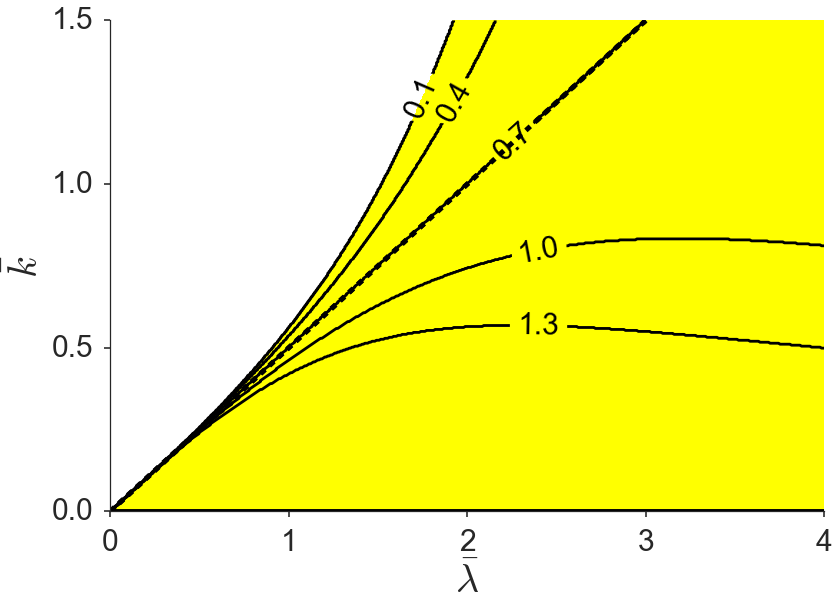

In [12]:
kink_ax = plt.gca()

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over('yellow')
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors='black')
kink_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt='%.1f')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)


kink_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
kink_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(kink_ax.get_xticklabels(), fontsize=30)
kink_ax.set_xticks(np.arange(0., 5, 1.))

kink_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(kink_ax.get_yticklabels(), fontsize=30)
kink_ax.set_yticks(np.arange(0., 2.0, 0.5))

sns.despine()
plt.show()

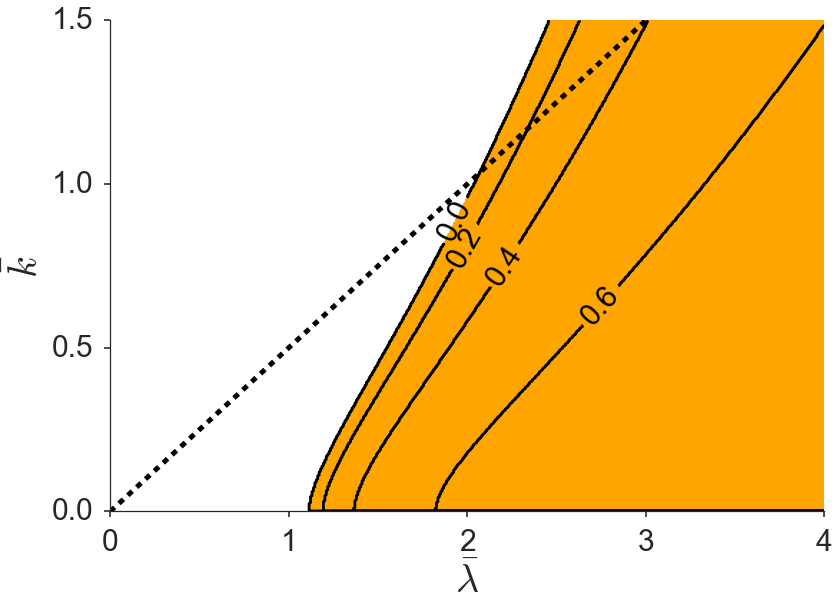

In [13]:
sausage_ax = plt.gca()

delta = -0.7
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.2, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1.2, 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('orange')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors='black')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.9, 0.9],
                                      [2.0, 0.8],
                                      [2.4, 0.7],
                                      [2.8, 0.6]),
                               fmt='%.1f')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(sausage_ax.get_xticklabels(), fontsize=30)
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(sausage_ax.get_yticklabels(), fontsize=30)
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))
sns.despine()
plt.show()

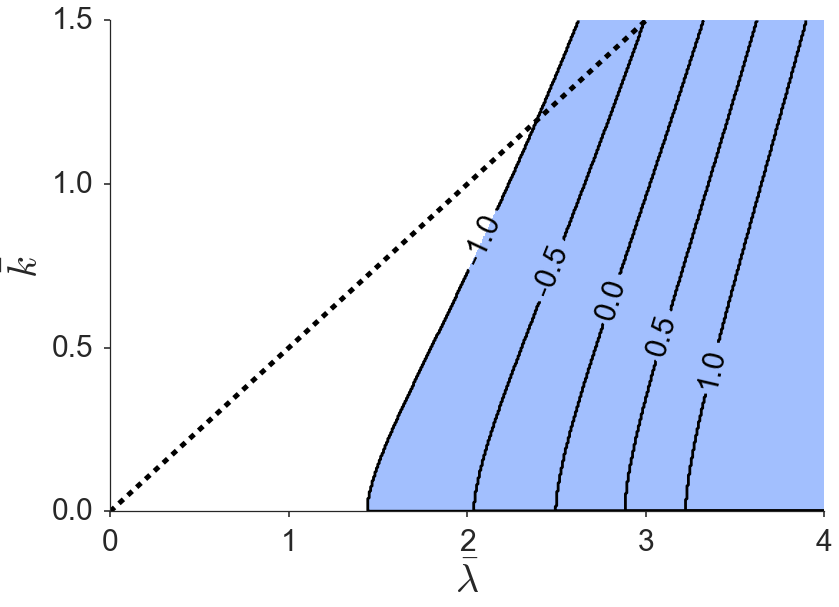

In [14]:
delta_ax = plt.gca()
epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)
contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors='black')
contour.cmap.set_over(sns.xkcd_rgb['pastel blue'])
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines, 
                  fontsize=30, 
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                          fmt='%.1f')
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
delta_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(delta_ax.get_xticklabels(), fontsize=30)
delta_ax.set_xticks(np.arange(0., 5, 1.))

delta_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(delta_ax.get_yticklabels(), fontsize=30)
delta_ax.set_yticks(np.arange(0., 2.0, 0.5))

sns.despine()

In [15]:
plt.subplot?

In [16]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 13)

In [17]:
gs.update?

# Fig. 2 - Numerics Profile

# two kink plots

## $\epsilon= 0.9$ $r_{skin}=0.03$

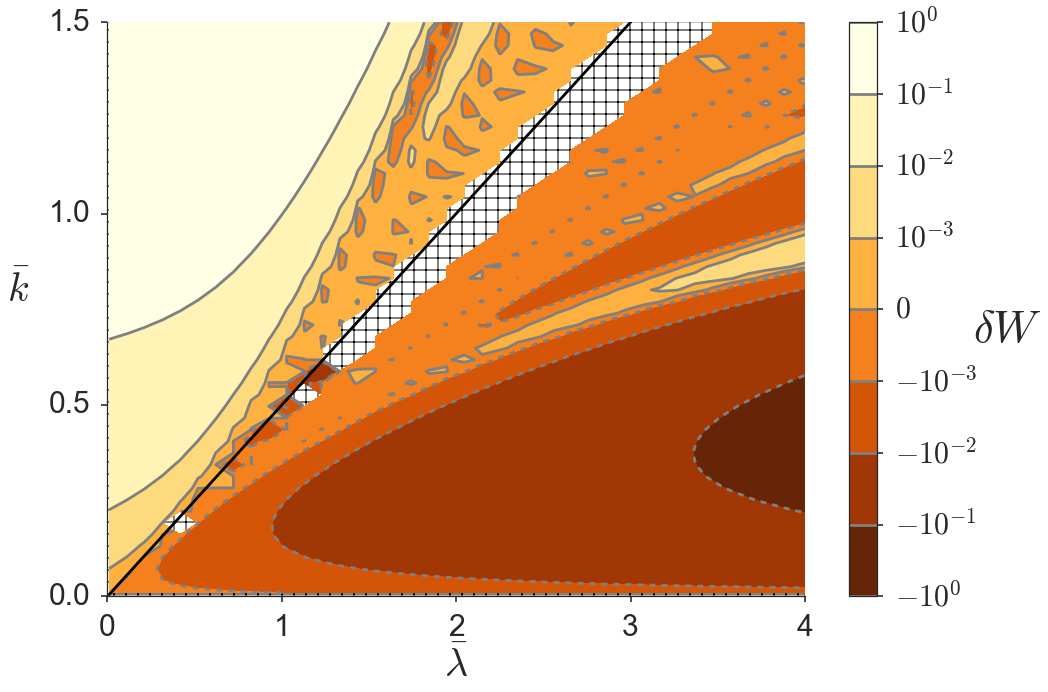

In [18]:
plot.plot_lambda_k_space_dw('../../output/2016-01-31-13-02/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=False,
                            label_pos=None,
                            interpolate=False, cmap="YlOrBr_r",
                            hatch=True,
                            bounds=(1.5, 4),
                            figsize=(15,10),
                            save_as='figure2a.png')

## $\epsilon= 0.9$ $r_{skin}=0.03$

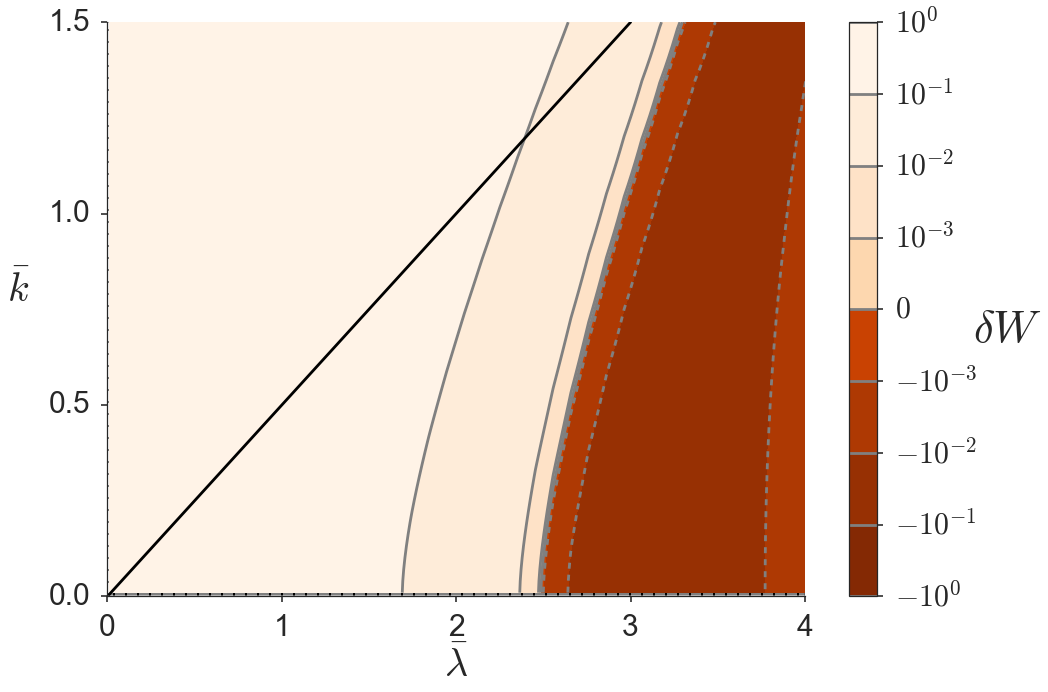

In [19]:
fig = plt.figure(figsize=(15,10))

plot.plot_lambda_k_space_dw('../../output/2016-01-31-13-02/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False, cmap="Oranges_r",
                            hatch=True,
                            bounds=(1.5, 4.0),
                            save_as='figure2b.png')

### $\epsilon= 0.5$ $r_{skin}=0.03$

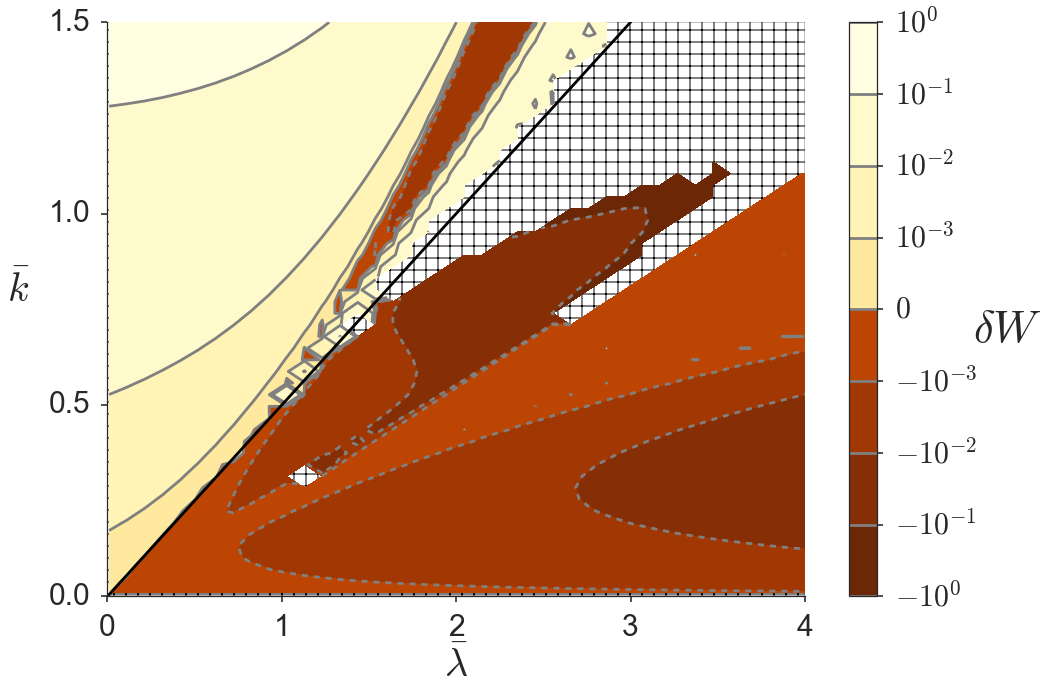

In [20]:
fig = plt.figure(figsize=(15,10))

plot.plot_lambda_k_space_dw('../../output/2016-02-07-11-15/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False, cmap="YlOrBr_r",
                            bounds=(1.5, 4),
                            hatch=True,
                            save_as='figure2d.png')

### $\epsilon= 0.5$ $r_{skin}=0.03$

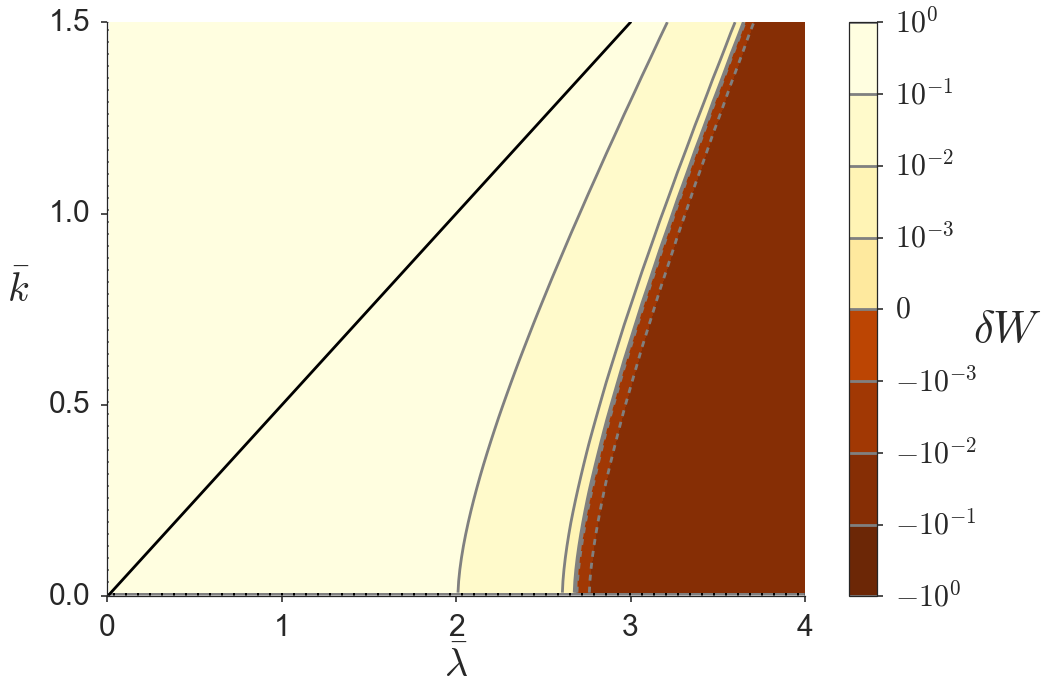

In [21]:
fig = plt.figure(figsize=(15,10))

plot.plot_lambda_k_space_dw('../../output/2016-02-07-11-15/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            bounds=(1.5, 4),
                            interpolate=False, cmap="YlOrBr_r",
                            hatch=True,
                            save_as='figure2e.png')

## plot of sausage over kink dW 

### $\epsilon= 0.9$ $r_{skin}=0.03$

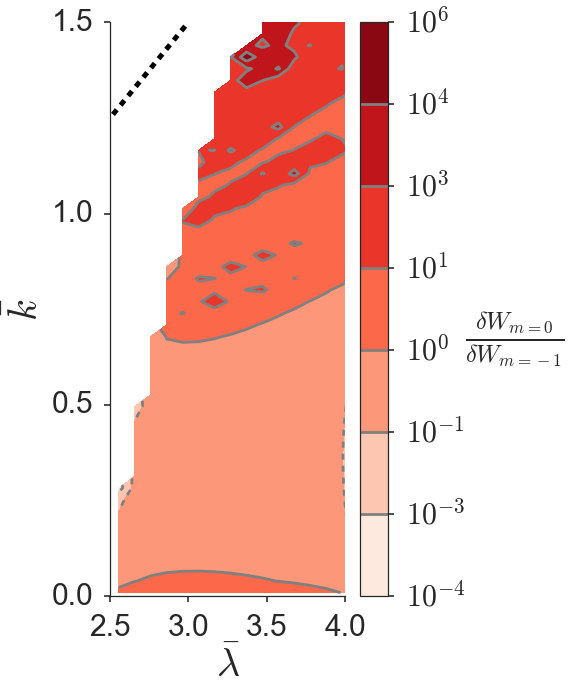

In [22]:
fig = plt.figure(figsize=(8,10))

plot.sausage_kink_ratio('../../output/2016-01-31-13-02/meshes.npz',
                        xy_limits=[0, 1.5, 2.5, 4], cmap="Reds",
                        save_as='figure2c.png')

### $\epsilon= 0.5$ $r_{skin}=0.03$

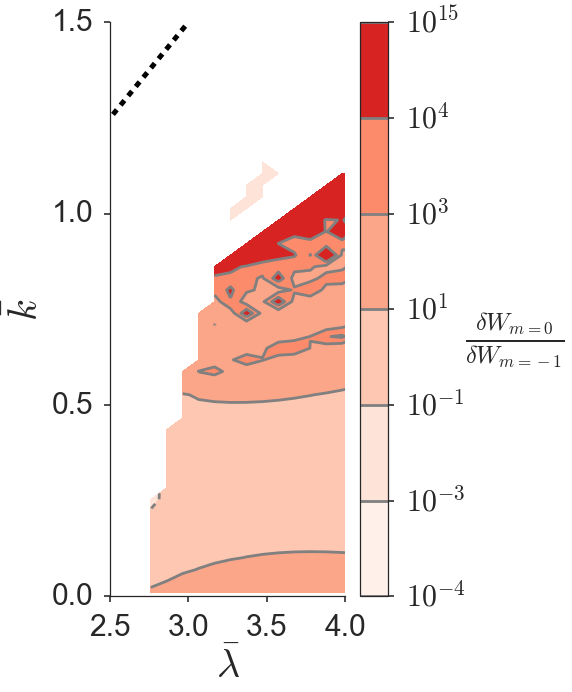

In [23]:
fig = plt.figure(figsize=(8,10))

plot.sausage_kink_ratio('../../output/2016-02-07-11-15/meshes.npz',
                        xy_limits=[0, 1.5, 2.5, 4], cmap="Reds",
                        levels=[-4, -3, -1, 1, 3, 4, 15])
plt.savefig('figure2f.png')

## Extras, used in talk

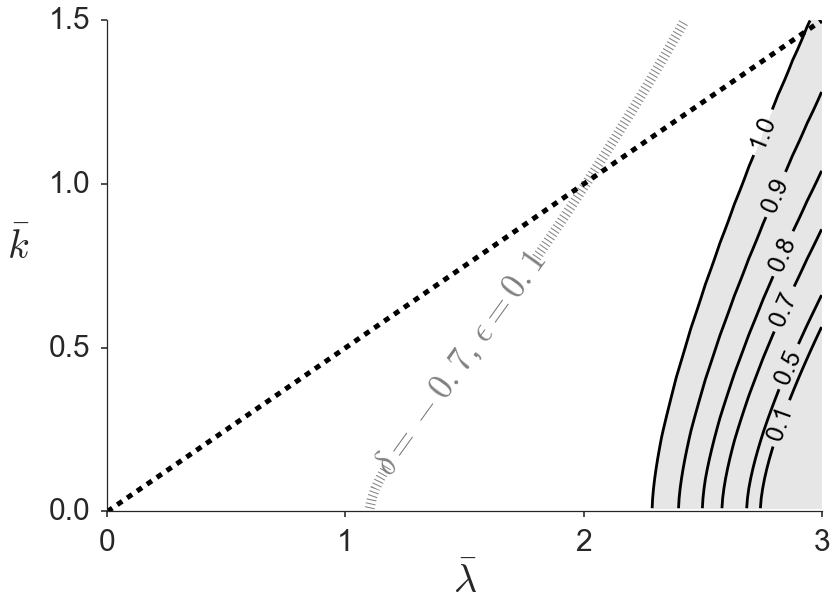

In [12]:
path_begin = '../../output/'
path_end = '/meshes.npz'

epsilons = [1.0, 0.9, 0.8, 0.7, 0.5, 0.1]
filenames = ['2016-01-01-11-45',
             '2016-01-03-14-22',
             '2016-01-03-14-27',
             '2016-01-03-14-32',
             '2016-01-01-11-50',
             '2016-01-01-11-55']
label_pos = [(2.6, 1.2),
             (2.7, 1.0),
             (2.8, 0.8),
             (2.9, 0.6),
             (3.0, 0.4),
             (3.1, 0.2)]


filename = path_begin + filenames[0] + path_end
meshes = np.load(filename)
lambda_a_mesh = meshes['lambda_a_mesh']
k_a_mesh = meshes['k_a_mesh']
external_m_neg_1 = meshes['d_w_m_neg_1']
external_sausage = meshes['d_w_m_0']
external_m_neg_1_norm = meshes['d_w_norm_m_neg_1']
external_sausage_norm = meshes['d_w_norm_m_0']
meshes.close()

levels = [0, 1]
     
contourf = plt.contourf(lambda_a_mesh, 
                        k_a_mesh, 
                        external_sausage,
                        levels=levels,
                        extend='both')
    
contourf.cmap.set_over('white')
contourf.cmap.set_under('0.9')
contourf.set_clim(0., 1e-16)

for i, epsilon in enumerate(epsilons):
    filename = path_begin + filenames[i] + path_end
    meshes = np.load(filename)
    lambda_a_mesh = meshes['lambda_a_mesh']
    k_a_mesh = meshes['k_a_mesh']
    external_m_neg_1 = meshes['d_w_m_neg_1']
    external_sausage = meshes['d_w_m_0']
    external_m_neg_1_norm = meshes['d_w_norm_m_neg_1']
    external_sausage_norm = meshes['d_w_norm_m_0']
    meshes.close()
    
    contour = plt.contour(lambda_a_mesh, 
                          k_a_mesh, 
                          external_sausage, 
                          levels=[0], 
                          colors='black')
    plt.clabel(contour, fmt={0: str(epsilon)}, 
               fontsize=25, 
               manual=[label_pos[i]])
    
plt.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

plt.xlabel(r'$\bar{\lambda}$', fontsize=40)
sausage_numeric_ax = plt.gca()
plt.setp(sausage_numeric_ax.get_xticklabels(), fontsize=30)
sausage_numeric_ax.set_xticks(np.arange(0., 5, 1.))

plt.ylabel(r'$\bar{k}$', fontsize=40, rotation='horizontal', labelpad=30)
plt.setp(sausage_numeric_ax.get_yticklabels(), fontsize=30)
sausage_numeric_ax.set_yticks(np.arange(0., 2.0, 0.5))
plt.xlim(0, 3.)

stability_uniform_sausage = ac.conditions(k_a_mesh, lambda_a_mesh,
                                           0.1, 0, -0.7)
uniform_contour = plt.contour(lambda_a_mesh, k_a_mesh, stability_uniform_sausage,
                              levels=[0], colors='grey', linewidths=10,
                              linestyles='dotted')

plt.clabel(uniform_contour, fmt={0: r'$\delta =-0.7$, $\epsilon = 0.1$'}, fontsize=35,
           manual=[(1.4, 0.5)])


sns.despine()
plt.show()

# $\delta$ map of $\epsilon$ = 0.1

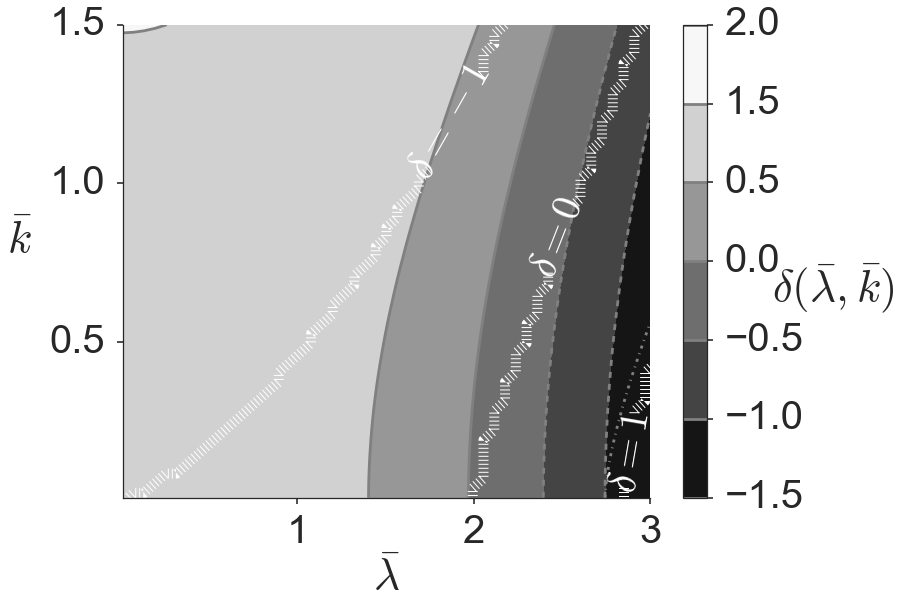

In [25]:
plot.plot_lambda_k_space_delta('../../output/2016-01-01-11-55/meshes.npz',
                               0, levels=[-1.5, -1, 
                                          -0.5, 0, 0.5, 1.5, 2],
                               interpolate=False, clip=True, delta_min=-4, 
                               delta_max=4,epsilon=0.1, compare_analytic=True,
                               plot_numeric_boundary=True, 
                               analytic_label_pos=[(1.8, 1.2), (2.3, 0.9), (2.9, 0.15)],
                               cmap="Greys_r", analytic_color='white')

# Fig 2 Profiles

In [175]:
def normalized_single_plot(profile, axes1, axes2, ylim, letter):
    r"""
    """
    axes1.spines['right'].set_visible(False)
    axes2.spines['left'].set_visible(False)
    axes1.spines['top'].set_visible(False)
    axes2.spines['top'].set_visible(False)
    axes2.spines['right'].set_visible(False)
    axes2.get_yaxis().set_visible(False)

    axes1.yaxis.tick_left()
    axes1.xaxis.tick_bottom()
    axes2.tick_params(labelright='off')
    axes2.yaxis.tick_right()
    axes2.xaxis.tick_bottom()

    d = .015
    kwargs = dict(transform=axes1.transAxes, color='k', clip_on=False)
    #axes1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)        
    axes1.plot((1 - d, 1 + d), (-d, d), **kwargs) 

    kwargs.update(transform=axes2.transAxes)  
    #axes2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 
    axes2.plot((-d*0.5*0.20*4, +d*0.5*0.20*4), (-d*0.3*4, d*0.3*4), **kwargs)
    
    splines = profile.get_splines()
    beta_spl = profile.beta(profile.r)
    r1 = np.linspace(0, 0.95, 250)
    r2 = np.linspace(0.95, 1, 250)
    
    j_skin = profile.j_skin
    b_z0 = profile.b_z0
    
    axes1.plot(r1, splines['j_z'](r1), lw=5, label=r'$\bar{j}_z$')
    axes1.plot(r1, splines['b_theta'](r1), lw=5, label=r'$\bar{B}_\theta$')
    axes1.plot(r1, splines['pressure'](r1), lw=5, label=r'$\bar{p}$')
    axes1.set_xlim(0, 0.95)
    
    axes2.plot(r2, splines['j_z'](r2), lw=5, label=r'$\bar{j}_z$')
    axes2.plot(r2, splines['b_theta'](r2), lw=5, label=r'$\bar{B}_\theta$')
    axes2.plot(r2, splines['pressure'](r2), lw=5, label=r'$\bar{p}$')
    axes2.set_xlim(0.95, 1)
    
    axes2.set_xlabel(r'$r$', fontsize=25)
    axes2.axvline(x=0.97, color='grey', ls='--', lw=5)
    axes2.axvline(x=0.98, color='grey', ls='--', lw=5)
    axes2.axvline(x=0.99, color='grey', ls='--', lw=5)
    
    axes1.set_ylim(0., ylim)
    axes2.set_ylim(0., ylim)
    axes1.legend(loc=2, fontsize=20)
    
    axes2.annotate('core', xy=(0.959, ylim*6./7.))
    axes2.annotate('transition', xy=(0.972, ylim*6./7.))
    axes2.annotate('skin', xy=(0.984, ylim*6./7.))
    axes2.annotate('transition', xy=(0.992, ylim*6./7.))
    
    plt.setp(axes.get_xticklabels(), fontsize=20)
    plt.setp(axes.get_yticklabels(), fontsize=20)

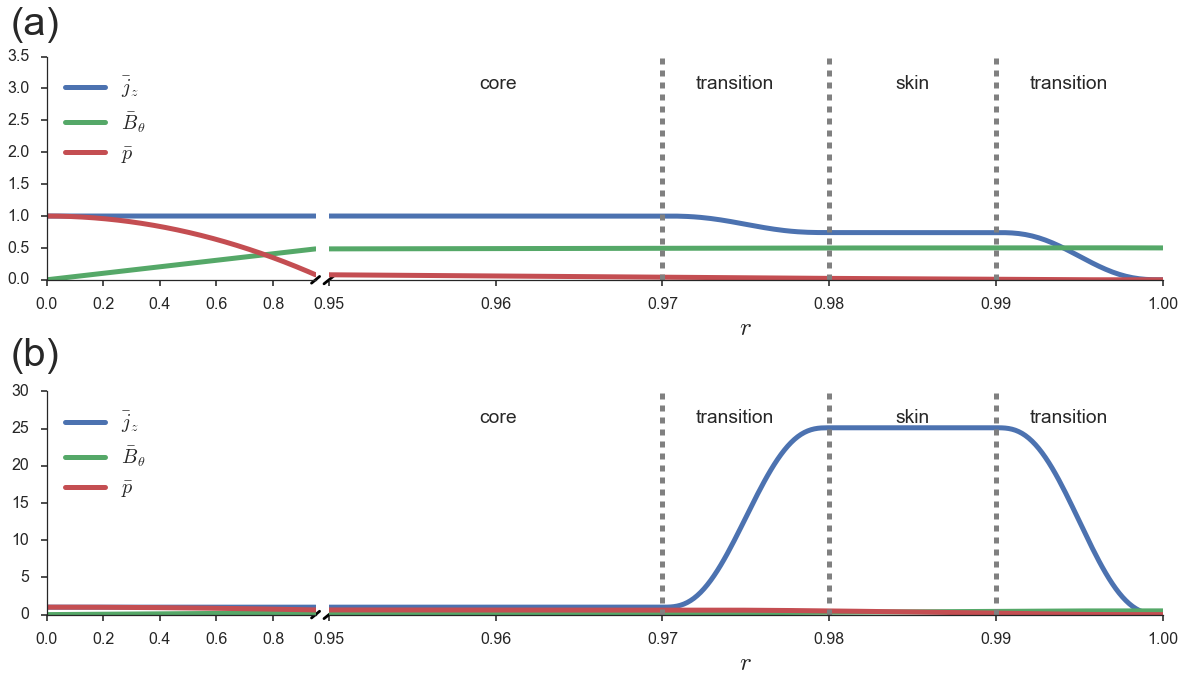

In [189]:
fig = plt.figure(figsize=(20,10))
axes1 = plt.subplot2grid((2, 4), (0, 0), colspan=1, rowspan=1)
axes2 = plt.subplot2grid((2, 4), (0, 1), colspan=3, rowspan=1)
axes3 = plt.subplot2grid((2, 4), (1, 0), colspan=1, rowspan=1)
axes4 = plt.subplot2grid((2, 4), (1, 1), colspan=3, rowspan=1)
fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(hspace=0.5)

profile = es.UnitlessSmoothedCoreSkin(k_bar=1, lambda_bar=1, epsilon=0.99, 
                                      core_radius_norm=0.97,
                                      transition_width_norm=0.01,
                                      skin_width_norm=0.01) 

normalized_single_plot(profile, axes1, axes2, 3.5, 'a')

profile = es.UnitlessSmoothedCoreSkin(k_bar=1, lambda_bar=1, epsilon=0.5, 
                                      core_radius_norm=0.97,
                                      transition_width_norm=0.01,
                                      skin_width_norm=0.01) 

normalized_single_plot(profile, axes3, axes4, 30, 'b')

plt.figtext(0.1, 0.93, '(a)', fontsize=40)
plt.figtext(0.1, 0.47, '(b)', fontsize=40)
plt.show()

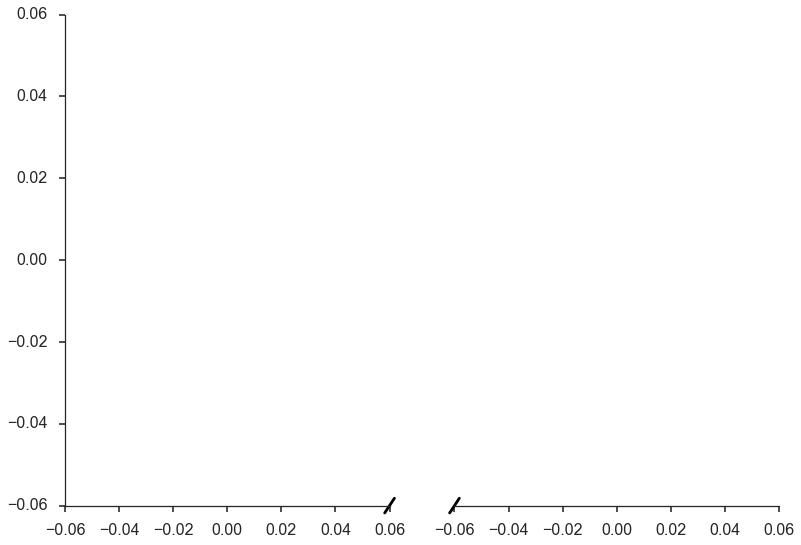

In [180]:
f, (axes1, axes2) = plt.subplots(1, 2, sharey=True)

axes1.spines['right'].set_visible(False)
axes2.spines['left'].set_visible(False)
axes1.spines['top'].set_visible(False)
axes2.spines['top'].set_visible(False)
axes2.spines['right'].set_visible(False)
axes2.get_yaxis().set_visible(False)


axes1.yaxis.tick_left()
axes1.xaxis.tick_bottom()
axes2.tick_params(labelright='off')
axes2.yaxis.tick_right()
axes2.xaxis.tick_bottom()

d = .015
kwargs = dict(transform=axes1.transAxes, color='k', clip_on=False)
#axes1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)        
axes1.plot((1 - d, 1 + d), (-d, d), **kwargs) 

kwargs.update(transform=axes2.transAxes)  
#axes2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 
axes2.plot((-d, +d), (-d, d), **kwargs)

plt.show()

# Fig 3 Summary Numerics Figure

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.colors import SymLogNorm, BoundaryNorm
from matplotlib.ticker import FormatStrFormatter, FixedFormatter
import matplotlib.patches as patches
import matplotlib.ticker as ticker

In [14]:
def plot_lambda_k_space_dw(axes, filename, epsilon, name, mode_to_plot='m_neg_1',
                           show_points=False, lim=None, levels=None, log=True,
                           linthresh=1E-7, bounds=(1.5, 3.0), norm=True,
                           analytic_compare=False,
                           label_pos=((0.5, 0.4), (2.1, 0.4), (2.8, 0.2)),
                           delta_values=[-1,0,1],
                           interpolate=False,
                           cmap=None, hatch=False,
                           figsize=None,
                           save_as=None,
                           return_ax=False):

    epsilon_case = np.load(filename)
    lambda_a_mesh = epsilon_case['lambda_a_mesh']
    k_a_mesh = epsilon_case['k_a_mesh']
    external_m_neg_1 = epsilon_case['d_w_m_neg_1']
    external_sausage = epsilon_case['d_w_m_0']
    epsilon_case.close()

    instability_map = {'m_0': external_sausage,
                       'm_neg_1': external_m_neg_1}


    kink_pal = sns.blend_palette([sns.xkcd_rgb["dandelion"],
                                  sns.xkcd_rgb["white"]], 7, as_cmap=True)
    kink_pal = sns.diverging_palette(73, 182, s=72, l=85, sep=1, n=9, as_cmap=True)
    sausage_pal = sns.blend_palette(['orange', 'white'], 7, as_cmap=True)
    sausage_pal = sns.diverging_palette(49, 181, s=99, l=78, sep=1, n=9, as_cmap=True)

    if cmap:
        instability_palette = {'m_0': cmap,
                               'm_neg_1': cmap}
    else:
        instability_palette = {'m_0': sausage_pal,
                               'm_neg_1': kink_pal}




    if interpolate:
        instability_map['m_neg_1'] = interpolate_nans(lambda_a_mesh,
                                                      k_a_mesh,
                                                      instability_map['m_neg_1']
                                                      )

    values = instability_map[mode_to_plot]

    if norm:
        values = values / np.nanmax(np.abs(values))
    else:
        values = values

    if levels:
        if log:
            plot = axes.contourf(lambda_a_mesh, k_a_mesh, values,
                                cmap=instability_palette[mode_to_plot],
                                levels=levels, norm=SymLogNorm(linthresh))
            divider = make_axes_locatable(axes)
            cax = divider.append_axes("right", size="5%", pad=0.55)
            cbar = plt.colorbar(plot, cax=cax, label=r'$\delta W$')
            cbar.ax.yaxis.set_ticks_position('right')
            cbar.set_label(label=r'$\delta W$', size=45, rotation=0, labelpad=30)
            contourlines = axes.contour(lambda_a_mesh, k_a_mesh,
                                      values, levels=levels,
                                      colors='grey',
                                      norm=SymLogNorm(linthresh))

        else:
            norm = BoundaryNorm(levels, 256)
            plot = axes.contourf(lambda_a_mesh, k_a_mesh, values,
                                cmap=instability_palette[mode_to_plot],
                                levels=levels, norm=norm)
            divider = make_axes_locatable(axes)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(plot, cax=cax, label=r'$\delta W$')
            cbar.set_label(label=r'$\delta W$', size=45, rotation=0, labelpad=30)
            contourlines = axes.contour(lambda_a_mesh, k_a_mesh,
                                       values, levels=levels,
                                       colors='grey')
    else:
        if log:
            plot = axes.contourf(lambda_a_mesh, k_a_mesh, values,
                                cmap=instability_palette[mode_to_plot],
                                norm=SymLogNorm(linthresh))
            divider = make_axes_locatable(axes)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(plot, cax=cax, label=r'$\delta W$')
            cbar.set_label(label=r'$\delta W$', size=45, rotation=0, labelpad=30)
            contourlines = axes.contour(lambda_a_mesh, k_a_mesh,
                                       values, colors='grey',
                                       norm=SymLogNorm(linthresh))
        else:
            plot = plt.contourf(lambda_a_mesh, k_a_mesh, values,
                                cmap=instability_palette[mode_to_plot])
            divider = make_axes_locatable(axes)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(plot, cax=cax, label=r'$\delta W$')
            cbar.set_label(label=r'$\delta W$', size=45, rotation=0, labelpad=30)
            contourlines = axes.contour(lambda_a_mesh, k_a_mesh,
                                       values, colors='grey')

    if lim:
        plot.set_clim(lim)
    
    cbar.add_lines(contourlines)

    axes.plot([0.01, 0.1, 1.0, 2.0, 3.0],
             [0.005, 0.05, 0.5, 1.0, 1.5], color='black')

    axes.set_axis_bgcolor(sns.xkcd_rgb['white'])

    lambda_bar_analytic = np.linspace(0.01, 3., 750)
    k_bar_analytic = np.linspace(0.01, 1.5, 750)
    (lambda_bar_mesh_analytic,
     k_bar_mesh_analytic) = np.meshgrid(lambda_bar_analytic, k_bar_analytic)

    if analytic_compare:
        analytic_comparison(mode_to_plot, k_bar_mesh_analytic,
                            lambda_bar_mesh_analytic, epsilon, label_pos)

    if show_points:
        axes.scatter(lambda_a_mesh, k_a_mesh, marker='o', c='b', s=5)

    axes.set_ylim(0.01, bounds[0])
    axes.set_xlim(0.01, bounds[1])
    axes.set_xticks(np.arange(0., 4.5, 1.))
    axes.set_yticks(np.arange(0., 2.0, 0.5))
    plt.setp(axes.get_xticklabels(), fontsize=40)
    plt.setp(axes.get_yticklabels(), fontsize=40)
    axes.set_ylabel(r'$\bar{k}$', fontsize=40, rotation='horizontal', labelpad=30)
    axes.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
    cbar.ax.tick_params(labelsize=40)

    def my_formatter_fun(x):
        if x == 0:
            return r'$0$'
        if np.sign(x) > 0:
            return r'$10^{%i}$' % np.int(np.log10(x))
        else:
            return r'$-10^{%i}$' % np.int(np.log10(np.abs(x)))
    labels = [my_formatter_fun(level) for level in levels]
    cbar.ax.set_yticklabels(labels)
    sns.despine(ax=axes)

    if hatch:
        xmin, xmax = axes.get_xlim()
        ymin, ymax = axes.get_ylim()
        xy = (xmin,ymin)
        width = xmax - xmin
        height = ymax - ymin
        p = patches.Rectangle(xy, width, height, hatch='+', fill=None, zorder=-10)
        axes.add_patch(p)
    cbar.ax.yaxis.set_ticks_position('right')

In [48]:
def sausage_kink_ratio(axes, filename, xy_limits=None, cmap=None, save_as=None,
                       levels=None, zero_line=2):
    r"""
    Plot ratio of sausage and kink potential energies.
    """
    meshes = np.load(filename)
    lambda_bar_mesh = meshes['lambda_a_mesh']
    k_bar_mesh = meshes['k_a_mesh']
    external_m_neg_1 = meshes['d_w_m_neg_1']
    external_sausage = meshes['d_w_m_0']
    meshes.close()

    sausage_stable_region = np.invert((external_sausage < 0))
    ratio = np.abs(external_sausage / external_m_neg_1)
    ratio[sausage_stable_region] = np.nan
    ratio_log = np.log10(ratio)

    if not cmap:
        cmap = sns.light_palette(sns.xkcd_rgb['red orange'],
                                 as_cmap=True)
    if levels:
        contours = axes.contourf(lambda_bar_mesh, k_bar_mesh,
                                ratio_log, cmap=cmap, levels=levels)
    else:
        contours = axes.contourf(lambda_bar_mesh, k_bar_mesh,
                                ratio_log, cmap=cmap)

    divider = make_axes_locatable(axes)
    cax = divider.append_axes("right", size="10%", pad=0.55)
    colorbar = plt.colorbar(contours, cax=cax, format=FormatStrFormatter(r'$10^{%i}$'))
    colorbar.set_label(r'$\frac{\delta W_{m=0}}{\delta W_{m=1}}$',
                       size=60, rotation=0, labelpad=70)
    if levels:
        lines = axes.contour(lambda_bar_mesh, k_bar_mesh,
                            ratio_log, colors='black', levels=levels)
    else:
        lines = axes.contour(lambda_bar_mesh, k_bar_mesh,
                            ratio_log, colors='black')
    plt.setp(lines.collections[zero_line], linewidth=5)
    colorbar.add_lines(lines)

    axes.plot([0, 3.], [0., 1.5], '--', c='black', lw=8)
    axes.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
    plt.setp(axes.get_xticklabels(), fontsize=30)
    axes.set_xticks(np.arange(0., 4.5, 0.5))

    axes.set_ylabel(r'$\bar{k}$', fontsize=40, rotation='horizontal')
    plt.setp(axes.get_yticklabels(), fontsize=30)
    axes.set_yticks(np.arange(0., 2.0, 0.5))
    
    #plt.clabel(lines)
    if xy_limits:
        axes.set_ylim((xy_limits[0], xy_limits[1]))
        axes.set_xlim((xy_limits[2], xy_limits[3]))
    plt.setp(axes.get_xticklabels(), fontsize=40)
    plt.setp(axes.get_yticklabels(), fontsize=40)
    colorbar.ax.yaxis.set_ticks_position('right')
    colorbar.ax.tick_params(labelsize=40)

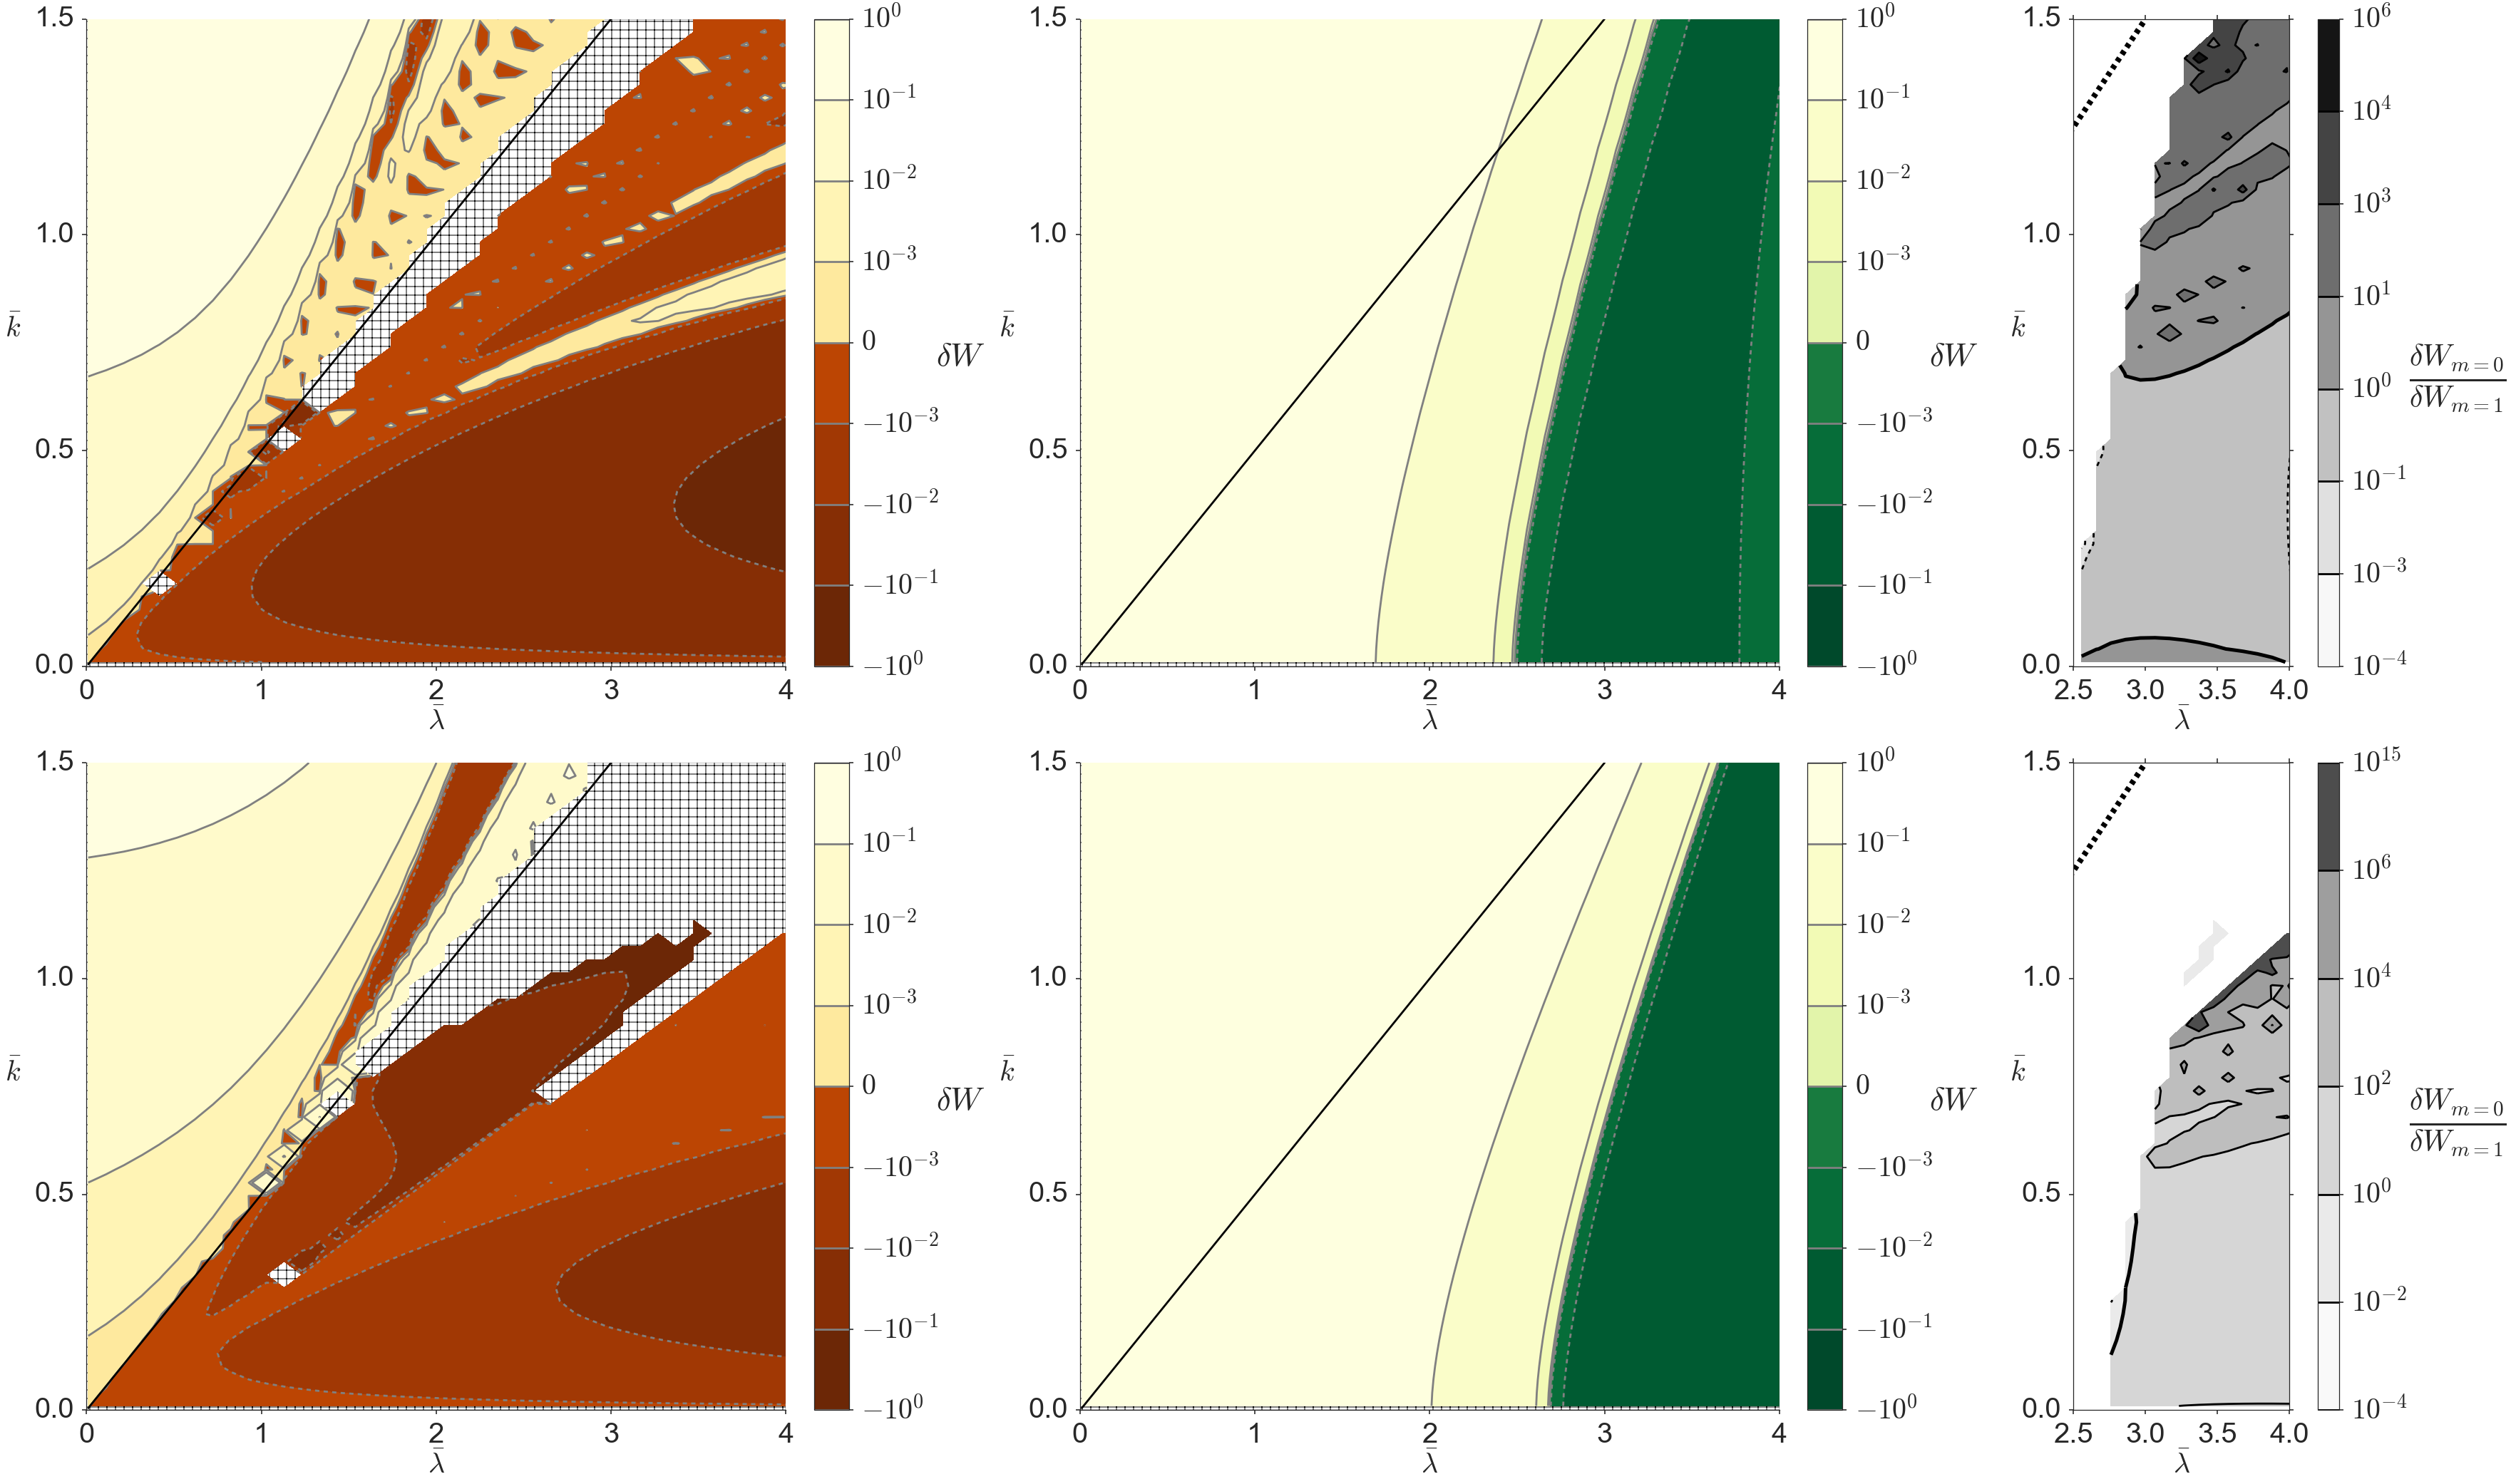

In [51]:
fig = plt.figure(figsize=(50,30))
kink_ax1 = plt.subplot2grid((6, 5), (0, 0), colspan=2, rowspan=3)
sausage_ax1 = plt.subplot2grid((6, 5), (0, 2), colspan=2, rowspan=3)
ratio_ax1 = plt.subplot2grid((6, 5), (0, 4), colspan=1, rowspan=3)
kink_ax2 = plt.subplot2grid((6, 5), (3, 0), colspan=2, rowspan=3)
sausage_ax2 = plt.subplot2grid((6, 5), (3, 2), colspan=2, rowspan=3)
ratio_ax2 = plt.subplot2grid((6, 5), (3, 4), colspan=1, rowspan=3)

plot_lambda_k_space_dw(kink_ax1, '../../output/2016-01-31-13-02/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_neg_1', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                               0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       interpolate=False, cmap="YlOrBr_r",
                       hatch=True,
                       bounds=(1.5, 4))


plot_lambda_k_space_dw(sausage_ax1, '../../output/2016-01-31-13-02/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_0', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                               0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       interpolate=False, cmap="YlGn_r",
                       hatch=True,
                       bounds=(1.5, 4.0))

sausage_kink_ratio(ratio_ax1, '../../output/2016-01-31-13-02/meshes.npz',
                   xy_limits=[0, 1.5, 2.5, 4], cmap="Greys",
                   zero_line=2)


plot_lambda_k_space_dw(kink_ax2, '../../output/2016-02-07-11-15/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_neg_1', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                               0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       interpolate=False, cmap="YlOrBr_r",
                       bounds=(1.5, 4),
                       hatch=True)

plot_lambda_k_space_dw(sausage_ax2, '../../output/2016-02-07-11-15/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_0', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       bounds=(1.5, 4),
                       interpolate=False, cmap="YlGn_r",
                       hatch=True)

sausage_kink_ratio(ratio_ax2, '../../output/2016-02-07-11-15/meshes.npz',
                   xy_limits=[0, 1.5, 2.5, 4], cmap="Greys", 
                   levels=[-4, -2, 0, 2, 4, 6, 15],
                   zero_line=2)

plt.tight_layout(pad=2.4, w_pad=1.0, h_pad=1.0)
fig.savefig('../../figures/figure_2.svg')